In [2]:
from matplotlib import pyplot as plt
import numpy as np
import time
from IPython.display import clear_output
import tensorflow as tf
import seaborn as sns
sns.set()

### Generate Data

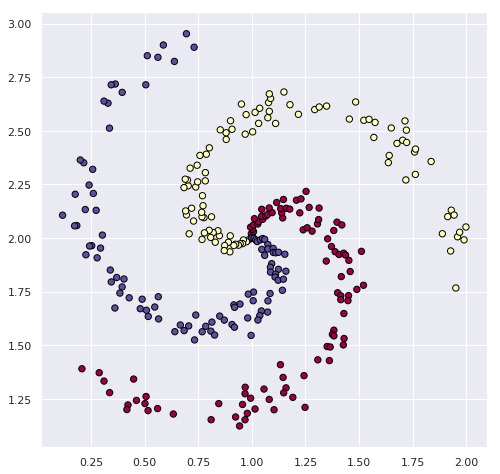

In [3]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
seed = 4 #keep seed
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
np.random.seed(seed) #fixing random 
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
X[:, 0] += 1
X[:, 1] += 2
# lets visualize the data:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors="black")
ax = plt.gca()
ax.set_aspect("equal")
plt.show()

### For this task we gonna use tf.nn module 
#### more info: https://www.tensorflow.org/api_docs/python/tf/nn

In [5]:
def model(x, weights, biases, keep_prob):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer